# Contributor Details
* Author Name : Yeshwanthraj G
* Team Name : The Unknown
* Leaderboard Rank : 111 (Kaggle Challenge)

# Load labels and inspect sample image

Train labels sample:
           image_id  label
0  img_ed005410.jpg      1
1  img_0c5ecd2a.jpg      1
2  img_ed713bb5.jpg      1
3  img_12c58874.jpg      1
4  img_eff357af.jpg      1

Columns in train_labels.csv: ['image_id', 'label']

Unique labels: [1]

Sample image path: /kaggle/input/soil-classification-part-2/soil_competition-2025/train/img_ed005410.jpg
Sample image size: (728, 728)


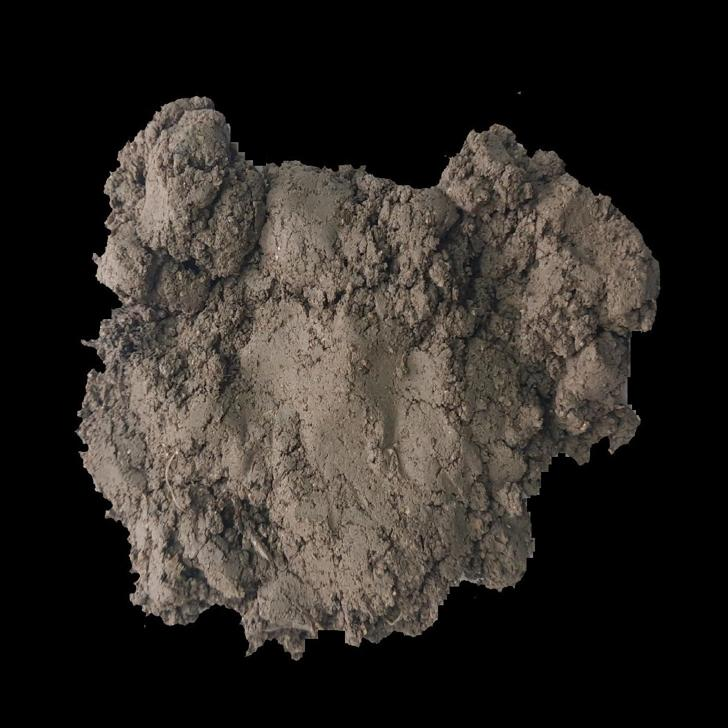

In [1]:
import os
import pandas as pd
from PIL import Image
from IPython.display import display
from tqdm import tqdm

# Base path to dataset folder
base_path = '/kaggle/input/soil-classification-part-2/soil_competition-2025'

# Load train labels CSV
train_labels = pd.read_csv(os.path.join(base_path, 'train_labels.csv'))

# Display label info
print("Train labels sample:")
print(train_labels.head())

print("\nColumns in train_labels.csv:", train_labels.columns.tolist())
print("\nUnique labels:", train_labels['label'].unique())

# Display a sample image
sample_img_id = train_labels.iloc[0]['image_id']
sample_img_path = os.path.join(base_path, 'train', sample_img_id)

print(f"\nSample image path: {sample_img_path}")
img = Image.open(sample_img_path)
print(f"Sample image size: {img.size}")
display(img)

# Extract features from train images using a pretrained CNN (ResNet50)

2025-05-25 13:27:32.056001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748179652.353016      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748179652.463633      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Train labels sample:
           image_id  label
0  img_ed005410.jpg      1
1  img_0c5ecd2a.jpg      1
2  img_ed713bb5.jpg      1
3  img_12c58874.jpg      1
4  img_eff357af.jpg      1

Columns in train_labels.csv: ['image_id', 'label']

Unique labels: [1]


2025-05-25 13:27:49.017187: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



Sample image path: /kaggle/input/soil-classification-part-2/soil_competition-2025/train/img_ed005410.jpg
Sample image size: (728, 728)


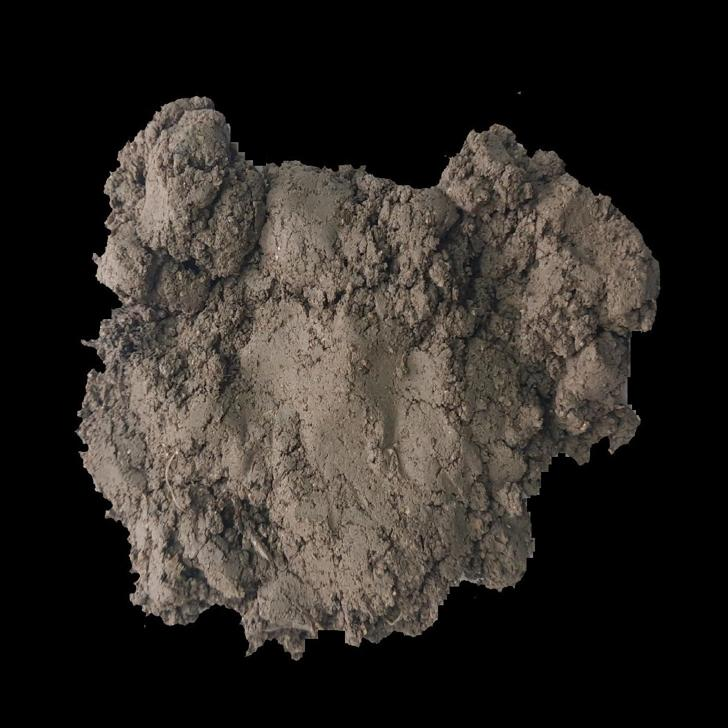

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Extracted features shape: (2048,)


In [2]:
import os
import pandas as pd
from PIL import Image
from IPython.display import display
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

# Define base path
base_path = '/kaggle/input/soil-classification-part-2/soil_competition-2025'

# Load train labels CSV
train_labels = pd.read_csv(os.path.join(base_path, 'train_labels.csv'))

# Inspect the first few rows of the labels
print("Train labels sample:")
print(train_labels.head())

# Check label column names and unique values
print("\nColumns in train_labels.csv:", train_labels.columns.tolist())
print("\nUnique labels:", train_labels['label'].unique())

# Load ResNet50 model WITHOUT pretrained weights (weights=None) to avoid internet download
model = ResNet50(weights=None, include_top=False, pooling='avg')

def extract_features(img_path):
    """Load an image file and extract features using ResNet50 model"""
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)  # Preprocess input for ResNet50
    features = model.predict(x)
    return features.flatten()

# Inspect a sample image filename and load it
sample_img_id = train_labels.iloc[0]['image_id']  # Adjust column name if different
sample_img_path = os.path.join(base_path, 'train', sample_img_id)  # Adjust extension if needed

print(f"\nSample image path: {sample_img_path}")
img = Image.open(sample_img_path)
print(f"Sample image size: {img.size}")
display(img)

# Extract features for the sample image (this will be random features since weights=None)
sample_features = extract_features(sample_img_path)
print(f"Extracted features shape: {sample_features.shape}")


# Extract features from test images similarly

In [3]:
# Load test IDs
test_ids = pd.read_csv(os.path.join(base_path, 'test_ids.csv'))

# Extract test features
test_features = []

print("Extracting features from test images...")

for idx, row in tqdm(test_ids.iterrows(), total=len(test_ids)):
    img_id = row['image_id']
    img_path = os.path.join(base_path, 'test', img_id)
    feat = extract_features(img_path)
    test_features.append(feat)

test_features = np.array(test_features)
test_df = pd.DataFrame(test_features)

print(f"Test features shape: {test_features.shape}")
print(f"Test DataFrame shape: {test_df.shape}")


Extracting features from test images...


  0%|          | 0/967 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  0%|          | 1/967 [00:00<03:53,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  0%|          | 2/967 [00:00<04:01,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  0%|          | 3/967 [00:00<03:53,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  0%|          | 4/967 [00:00<03:49,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  1%|          | 5/967 [00:01<03:49,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  1%|          | 6/967 [00:01<03:52,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  1%|          | 7/967 [00:01<03:49,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 8/967 [00:01<03:49,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  1%|          | 9/967 [00:02<03:50,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  1%|          | 10/967 [00:02<03:59,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  1%|          | 11/967 [00:02<03:56,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  1%|          | 12/967 [00:02<03:55,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  1%|▏         | 13/967 [00:03<03:48,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  1%|▏         | 14/967 [00:03<03:51,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  2%|▏         | 15/967 [00:03<03:47,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 16/967 [00:03<03:41,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 17/967 [00:04<03:43,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  2%|▏         | 18/967 [00:04<04:28,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  2%|▏         | 19/967 [00:04<04:14,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  2%|▏         | 20/967 [00:04<04:05,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  2%|▏         | 21/967 [00:05<03:49,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  2%|▏         | 22/967 [00:05<03:39,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  2%|▏         | 23/967 [00:05<03:31,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  2%|▏         | 24/967 [00:05<03:31,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  3%|▎         | 25/967 [00:05<03:24,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  3%|▎         | 26/967 [00:06<03:22,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  3%|▎         | 27/967 [00:06<03:17,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  3%|▎         | 28/967 [00:06<03:14,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  3%|▎         | 29/967 [00:06<03:15,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  3%|▎         | 30/967 [00:07<03:14,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  3%|▎         | 31/967 [00:07<03:13,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  3%|▎         | 32/967 [00:07<03:13,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  3%|▎         | 33/967 [00:07<03:13,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  4%|▎         | 34/967 [00:07<03:13,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  4%|▎         | 35/967 [00:08<03:12,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  4%|▎         | 36/967 [00:08<03:11,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  4%|▍         | 37/967 [00:08<03:12,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  4%|▍         | 38/967 [00:08<03:12,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  4%|▍         | 39/967 [00:08<03:17,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  4%|▍         | 40/967 [00:09<03:23,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  4%|▍         | 41/967 [00:09<03:28,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  4%|▍         | 42/967 [00:09<03:30,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  4%|▍         | 43/967 [00:09<03:25,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  5%|▍         | 44/967 [00:10<03:17,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  5%|▍         | 45/967 [00:10<03:15,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  5%|▍         | 46/967 [00:10<03:16,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  5%|▍         | 47/967 [00:10<03:12,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  5%|▍         | 48/967 [00:10<03:12,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  5%|▌         | 49/967 [00:11<03:13,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  5%|▌         | 50/967 [00:11<03:11,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  5%|▌         | 51/967 [00:11<03:07,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  5%|▌         | 52/967 [00:11<03:17,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  5%|▌         | 53/967 [00:11<03:15,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  6%|▌         | 54/967 [00:12<03:23,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  6%|▌         | 55/967 [00:12<03:27,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  6%|▌         | 56/967 [00:12<03:23,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  6%|▌         | 57/967 [00:12<03:16,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  6%|▌         | 58/967 [00:13<03:11,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  6%|▌         | 59/967 [00:13<03:06,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  6%|▌         | 60/967 [00:13<03:03,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  6%|▋         | 61/967 [00:13<03:02,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  6%|▋         | 62/967 [00:13<03:00,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  7%|▋         | 63/967 [00:13<02:58,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  7%|▋         | 64/967 [00:14<02:56,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  7%|▋         | 65/967 [00:14<03:03,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  7%|▋         | 66/967 [00:14<03:03,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  7%|▋         | 67/967 [00:14<03:02,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  7%|▋         | 68/967 [00:15<03:01,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  7%|▋         | 69/967 [00:15<03:01,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  7%|▋         | 70/967 [00:15<03:06,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  7%|▋         | 71/967 [00:15<03:09,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  7%|▋         | 72/967 [00:15<03:05,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  8%|▊         | 73/967 [00:16<03:10,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  8%|▊         | 74/967 [00:16<03:06,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  8%|▊         | 75/967 [00:16<03:03,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  8%|▊         | 76/967 [00:16<03:02,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  8%|▊         | 77/967 [00:16<03:01,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  8%|▊         | 78/967 [00:17<03:04,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  8%|▊         | 79/967 [00:17<03:02,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  8%|▊         | 80/967 [00:17<03:03,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  8%|▊         | 81/967 [00:17<03:09,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  8%|▊         | 82/967 [00:17<03:07,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▊         | 83/967 [00:18<03:02,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  9%|▊         | 84/967 [00:18<03:01,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  9%|▉         | 85/967 [00:18<03:00,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  9%|▉         | 86/967 [00:18<02:58,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  9%|▉         | 87/967 [00:18<02:55,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  9%|▉         | 88/967 [00:19<02:55,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  9%|▉         | 89/967 [00:19<03:03,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  9%|▉         | 90/967 [00:19<03:06,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  9%|▉         | 91/967 [00:19<03:12,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 10%|▉         | 92/967 [00:20<03:13,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 10%|▉         | 93/967 [00:20<03:17,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 10%|▉         | 94/967 [00:20<03:12,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 10%|▉         | 95/967 [00:20<03:14,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 10%|▉         | 96/967 [00:20<03:07,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 10%|█         | 97/967 [00:21<03:04,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 10%|█         | 98/967 [00:21<03:04,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 10%|█         | 99/967 [00:21<03:15,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 10%|█         | 100/967 [00:21<03:08,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 10%|█         | 101/967 [00:21<03:04,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 11%|█         | 102/967 [00:22<03:01,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 11%|█         | 103/967 [00:22<03:08,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 11%|█         | 104/967 [00:22<03:05,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 11%|█         | 105/967 [00:22<03:17,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 11%|█         | 106/967 [00:23<03:08,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 11%|█         | 107/967 [00:23<03:03,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 11%|█         | 108/967 [00:23<03:01,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 11%|█▏        | 109/967 [00:23<02:58,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 11%|█▏        | 110/967 [00:23<02:54,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 11%|█▏        | 111/967 [00:24<02:57,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 12%|█▏        | 112/967 [00:24<02:55,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 12%|█▏        | 113/967 [00:24<02:55,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 12%|█▏        | 114/967 [00:24<02:55,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 12%|█▏        | 115/967 [00:24<02:53,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 12%|█▏        | 116/967 [00:25<02:51,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 12%|█▏        | 117/967 [00:25<02:52,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 12%|█▏        | 118/967 [00:25<02:52,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 12%|█▏        | 119/967 [00:25<02:52,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 12%|█▏        | 120/967 [00:25<02:50,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 13%|█▎        | 121/967 [00:26<02:51,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 13%|█▎        | 122/967 [00:26<02:59,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 13%|█▎        | 123/967 [00:26<03:04,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 13%|█▎        | 124/967 [00:26<03:07,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 13%|█▎        | 125/967 [00:27<03:10,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 13%|█▎        | 126/967 [00:27<03:10,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 13%|█▎        | 127/967 [00:27<03:10,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 13%|█▎        | 128/967 [00:27<03:50,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 13%|█▎        | 129/967 [00:28<03:29,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 13%|█▎        | 130/967 [00:28<03:14,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 14%|█▎        | 131/967 [00:28<03:08,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 14%|█▎        | 132/967 [00:28<02:59,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 14%|█▍        | 133/967 [00:28<02:54,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 14%|█▍        | 134/967 [00:29<03:00,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 14%|█▍        | 135/967 [00:29<02:55,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 14%|█▍        | 136/967 [00:29<02:51,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 14%|█▍        | 137/967 [00:29<02:53,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 14%|█▍        | 138/967 [00:29<02:51,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 14%|█▍        | 139/967 [00:30<02:49,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 14%|█▍        | 140/967 [00:30<02:47,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 15%|█▍        | 141/967 [00:30<02:45,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 15%|█▍        | 142/967 [00:30<02:43,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 15%|█▍        | 143/967 [00:30<02:42,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 15%|█▍        | 144/967 [00:31<02:41,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 15%|█▍        | 145/967 [00:31<02:40,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 15%|█▌        | 146/967 [00:31<02:40,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 15%|█▌        | 147/967 [00:31<02:40,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 15%|█▌        | 148/967 [00:31<03:06,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 15%|█▌        | 149/967 [00:32<03:04,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 16%|█▌        | 150/967 [00:32<03:02,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 16%|█▌        | 151/967 [00:32<02:57,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 16%|█▌        | 152/967 [00:32<02:52,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 16%|█▌        | 153/967 [00:33<02:47,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 16%|█▌        | 154/967 [00:33<02:44,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 16%|█▌        | 155/967 [00:33<02:44,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 16%|█▌        | 156/967 [00:33<02:47,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 16%|█▌        | 157/967 [00:33<02:45,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 16%|█▋        | 158/967 [00:34<02:43,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 16%|█▋        | 159/967 [00:34<02:52,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 17%|█▋        | 160/967 [00:34<02:51,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 17%|█▋        | 161/967 [00:34<02:49,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 17%|█▋        | 162/967 [00:34<02:47,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 163/967 [00:35<02:45,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 17%|█▋        | 164/967 [00:35<02:44,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 165/967 [00:35<02:43,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 17%|█▋        | 166/967 [00:35<02:44,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 17%|█▋        | 167/967 [00:35<02:41,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 17%|█▋        | 168/967 [00:36<02:42,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 169/967 [00:36<02:41,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 18%|█▊        | 170/967 [00:36<02:39,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 18%|█▊        | 171/967 [00:36<02:39,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 18%|█▊        | 172/967 [00:36<02:37,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 18%|█▊        | 173/967 [00:37<02:39,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 18%|█▊        | 174/967 [00:37<02:39,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 18%|█▊        | 175/967 [00:37<02:40,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 18%|█▊        | 176/967 [00:37<02:39,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 18%|█▊        | 177/967 [00:37<02:40,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 18%|█▊        | 178/967 [00:38<02:37,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 19%|█▊        | 179/967 [00:38<02:36,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 19%|█▊        | 180/967 [00:38<02:41,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 19%|█▊        | 181/967 [00:38<02:40,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 19%|█▉        | 182/967 [00:38<02:37,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 19%|█▉        | 183/967 [00:39<02:36,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 19%|█▉        | 184/967 [00:39<02:35,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 19%|█▉        | 185/967 [00:39<02:39,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 19%|█▉        | 186/967 [00:39<02:42,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 19%|█▉        | 187/967 [00:39<02:41,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 19%|█▉        | 188/967 [00:40<02:43,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 20%|█▉        | 189/967 [00:40<02:40,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 20%|█▉        | 190/967 [00:40<02:39,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 20%|█▉        | 191/967 [00:40<02:38,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 20%|█▉        | 192/967 [00:40<02:36,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 20%|█▉        | 193/967 [00:41<02:38,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 20%|██        | 194/967 [00:41<02:37,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 20%|██        | 195/967 [00:41<02:37,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 20%|██        | 196/967 [00:41<02:38,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 20%|██        | 197/967 [00:41<02:38,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 20%|██        | 198/967 [00:42<02:38,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 21%|██        | 199/967 [00:42<02:47,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 21%|██        | 200/967 [00:42<02:44,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 21%|██        | 201/967 [00:42<02:40,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 21%|██        | 202/967 [00:43<02:37,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 21%|██        | 203/967 [00:43<02:33,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 21%|██        | 204/967 [00:43<02:31,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 21%|██        | 205/967 [00:43<02:33,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 21%|██▏       | 206/967 [00:43<02:31,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 21%|██▏       | 207/967 [00:44<02:29,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 22%|██▏       | 208/967 [00:44<02:28,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 22%|██▏       | 209/967 [00:44<02:30,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 22%|██▏       | 210/967 [00:44<02:29,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 22%|██▏       | 211/967 [00:44<02:29,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 22%|██▏       | 212/967 [00:45<02:29,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 22%|██▏       | 213/967 [00:45<02:29,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 22%|██▏       | 214/967 [00:45<02:29,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 22%|██▏       | 215/967 [00:45<02:29,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 22%|██▏       | 216/967 [00:45<02:30,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 22%|██▏       | 217/967 [00:46<02:28,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 23%|██▎       | 218/967 [00:46<02:28,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 219/967 [00:46<02:28,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 23%|██▎       | 220/967 [00:46<02:28,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 23%|██▎       | 221/967 [00:46<02:28,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 23%|██▎       | 222/967 [00:47<02:28,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 223/967 [00:47<02:28,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 224/967 [00:47<02:28,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 23%|██▎       | 225/967 [00:47<02:28,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 23%|██▎       | 226/967 [00:47<02:27,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 23%|██▎       | 227/967 [00:48<02:25,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 24%|██▎       | 228/967 [00:48<02:24,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 24%|██▎       | 229/967 [00:48<02:24,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 24%|██▍       | 230/967 [00:48<02:25,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 24%|██▍       | 231/967 [00:48<02:24,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 24%|██▍       | 232/967 [00:48<02:23,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 24%|██▍       | 233/967 [00:49<02:24,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 24%|██▍       | 234/967 [00:49<02:25,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 24%|██▍       | 235/967 [00:49<02:27,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 24%|██▍       | 236/967 [00:49<02:26,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 25%|██▍       | 237/967 [00:49<02:26,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 25%|██▍       | 238/967 [00:50<02:28,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 25%|██▍       | 239/967 [00:50<02:27,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 25%|██▍       | 240/967 [00:50<02:27,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 25%|██▍       | 241/967 [00:50<02:25,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 25%|██▌       | 242/967 [00:50<02:25,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 25%|██▌       | 243/967 [00:51<02:23,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 25%|██▌       | 244/967 [00:51<02:23,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 25%|██▌       | 245/967 [00:51<02:25,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 25%|██▌       | 246/967 [00:51<02:26,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 26%|██▌       | 247/967 [00:52<02:25,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 26%|██▌       | 248/967 [00:52<02:29,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 26%|██▌       | 249/967 [00:52<02:34,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 26%|██▌       | 250/967 [00:52<02:33,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 26%|██▌       | 251/967 [00:52<02:30,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 26%|██▌       | 252/967 [00:53<02:26,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 26%|██▌       | 253/967 [00:53<02:24,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 26%|██▋       | 254/967 [00:53<02:22,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 26%|██▋       | 255/967 [00:53<02:24,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 26%|██▋       | 256/967 [00:53<02:24,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 27%|██▋       | 257/967 [00:54<02:22,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 27%|██▋       | 258/967 [00:54<02:20,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 27%|██▋       | 259/967 [00:54<02:21,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 27%|██▋       | 260/967 [00:54<02:20,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 27%|██▋       | 261/967 [00:54<02:19,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 27%|██▋       | 262/967 [00:55<02:18,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 27%|██▋       | 263/967 [00:55<02:18,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 27%|██▋       | 264/967 [00:55<02:18,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 27%|██▋       | 265/967 [00:55<02:19,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 28%|██▊       | 266/967 [00:55<02:18,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 28%|██▊       | 267/967 [00:56<02:17,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 28%|██▊       | 268/967 [00:56<02:16,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 28%|██▊       | 269/967 [00:56<02:18,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 28%|██▊       | 270/967 [00:56<02:18,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 28%|██▊       | 271/967 [00:56<02:18,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 28%|██▊       | 272/967 [00:57<02:17,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 28%|██▊       | 273/967 [00:57<02:16,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 28%|██▊       | 274/967 [00:57<02:16,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 28%|██▊       | 275/967 [00:57<02:15,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 29%|██▊       | 276/967 [00:57<02:15,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 29%|██▊       | 277/967 [00:58<02:15,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 29%|██▊       | 278/967 [00:58<02:16,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 29%|██▉       | 279/967 [00:58<02:15,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 29%|██▉       | 280/967 [00:58<02:25,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 29%|██▉       | 281/967 [00:58<02:29,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 29%|██▉       | 282/967 [00:59<02:35,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 29%|██▉       | 283/967 [00:59<02:36,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 29%|██▉       | 284/967 [00:59<02:39,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 29%|██▉       | 285/967 [00:59<03:09,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 30%|██▉       | 286/967 [01:00<03:02,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 30%|██▉       | 287/967 [01:00<02:50,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 30%|██▉       | 288/967 [01:00<02:41,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 30%|██▉       | 289/967 [01:00<02:32,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 30%|██▉       | 290/967 [01:01<02:25,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 30%|███       | 291/967 [01:01<02:22,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 30%|███       | 292/967 [01:01<02:18,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 30%|███       | 293/967 [01:01<02:20,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 30%|███       | 294/967 [01:01<02:18,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 31%|███       | 295/967 [01:02<02:21,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 31%|███       | 296/967 [01:02<02:26,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 31%|███       | 297/967 [01:02<02:26,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 31%|███       | 298/967 [01:02<02:22,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 31%|███       | 299/967 [01:02<02:19,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 31%|███       | 300/967 [01:03<02:17,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 31%|███       | 301/967 [01:03<02:14,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 31%|███       | 302/967 [01:03<02:14,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 31%|███▏      | 303/967 [01:03<02:16,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 31%|███▏      | 304/967 [01:03<02:14,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 32%|███▏      | 305/967 [01:04<02:15,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 32%|███▏      | 306/967 [01:04<02:14,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 32%|███▏      | 307/967 [01:04<02:13,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 32%|███▏      | 308/967 [01:04<02:14,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 32%|███▏      | 309/967 [01:04<02:14,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 32%|███▏      | 310/967 [01:05<02:14,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 32%|███▏      | 311/967 [01:05<02:15,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 32%|███▏      | 312/967 [01:05<02:16,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 32%|███▏      | 313/967 [01:05<02:20,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 32%|███▏      | 314/967 [01:06<02:17,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 33%|███▎      | 315/967 [01:06<02:16,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 33%|███▎      | 316/967 [01:06<02:13,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 33%|███▎      | 317/967 [01:06<02:14,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 33%|███▎      | 318/967 [01:06<02:13,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 33%|███▎      | 319/967 [01:07<02:10,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 33%|███▎      | 320/967 [01:07<02:10,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 33%|███▎      | 321/967 [01:07<02:10,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 33%|███▎      | 322/967 [01:07<02:12,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 33%|███▎      | 323/967 [01:07<02:12,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 34%|███▎      | 324/967 [01:08<02:11,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 34%|███▎      | 325/967 [01:08<02:10,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 34%|███▎      | 326/967 [01:08<02:09,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 34%|███▍      | 327/967 [01:08<02:09,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 34%|███▍      | 328/967 [01:08<02:08,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 34%|███▍      | 329/967 [01:09<02:12,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 34%|███▍      | 330/967 [01:09<02:10,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 34%|███▍      | 331/967 [01:09<02:09,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 34%|███▍      | 332/967 [01:09<02:08,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 34%|███▍      | 333/967 [01:09<02:07,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 35%|███▍      | 334/967 [01:10<02:13,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 35%|███▍      | 335/967 [01:10<02:11,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 35%|███▍      | 336/967 [01:10<02:09,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 35%|███▍      | 337/967 [01:10<02:08,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 35%|███▍      | 338/967 [01:10<02:06,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 35%|███▌      | 339/967 [01:11<02:05,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 35%|███▌      | 340/967 [01:11<02:04,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 35%|███▌      | 341/967 [01:11<02:05,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 35%|███▌      | 342/967 [01:11<02:05,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 35%|███▌      | 343/967 [01:11<02:05,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 36%|███▌      | 344/967 [01:12<02:04,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 36%|███▌      | 345/967 [01:12<02:12,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 36%|███▌      | 346/967 [01:12<02:12,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 36%|███▌      | 347/967 [01:12<02:10,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 36%|███▌      | 348/967 [01:12<02:08,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 36%|███▌      | 349/967 [01:13<02:06,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 36%|███▌      | 350/967 [01:13<02:04,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 36%|███▋      | 351/967 [01:13<02:03,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 36%|███▋      | 352/967 [01:13<02:03,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 37%|███▋      | 353/967 [01:13<02:03,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 37%|███▋      | 354/967 [01:14<02:02,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 37%|███▋      | 355/967 [01:14<02:02,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 37%|███▋      | 356/967 [01:14<02:02,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 37%|███▋      | 357/967 [01:14<02:02,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 37%|███▋      | 358/967 [01:14<02:00,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 37%|███▋      | 359/967 [01:15<01:59,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 37%|███▋      | 360/967 [01:15<01:59,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 37%|███▋      | 361/967 [01:15<01:58,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 37%|███▋      | 362/967 [01:15<01:59,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 38%|███▊      | 363/967 [01:15<01:58,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 38%|███▊      | 364/967 [01:16<01:58,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 38%|███▊      | 365/967 [01:16<01:59,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 38%|███▊      | 366/967 [01:16<01:59,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 38%|███▊      | 367/967 [01:16<01:58,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 38%|███▊      | 368/967 [01:16<01:57,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 38%|███▊      | 369/967 [01:17<01:57,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 38%|███▊      | 370/967 [01:17<01:56,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 38%|███▊      | 371/967 [01:17<01:55,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 38%|███▊      | 372/967 [01:17<01:55,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 39%|███▊      | 373/967 [01:17<01:54,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 39%|███▊      | 374/967 [01:18<01:53,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 39%|███▉      | 375/967 [01:18<01:52,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 39%|███▉      | 376/967 [01:18<01:53,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 39%|███▉      | 377/967 [01:18<01:56,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 39%|███▉      | 378/967 [01:18<01:56,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 39%|███▉      | 379/967 [01:19<01:55,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 39%|███▉      | 380/967 [01:19<01:54,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 39%|███▉      | 381/967 [01:19<01:55,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 40%|███▉      | 382/967 [01:19<01:56,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 40%|███▉      | 383/967 [01:19<01:56,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 40%|███▉      | 384/967 [01:20<01:56,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 40%|███▉      | 385/967 [01:20<01:55,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 40%|███▉      | 386/967 [01:20<01:54,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 40%|████      | 387/967 [01:20<01:54,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 40%|████      | 388/967 [01:20<01:53,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 40%|████      | 389/967 [01:21<01:53,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 40%|████      | 390/967 [01:21<01:54,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 40%|████      | 391/967 [01:21<01:53,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 41%|████      | 392/967 [01:21<01:54,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 41%|████      | 393/967 [01:21<01:54,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 41%|████      | 394/967 [01:22<01:52,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 41%|████      | 395/967 [01:22<01:53,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 41%|████      | 396/967 [01:22<02:01,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 41%|████      | 397/967 [01:22<02:01,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 41%|████      | 398/967 [01:22<01:59,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 41%|████▏     | 399/967 [01:23<01:56,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 41%|████▏     | 400/967 [01:23<01:54,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 41%|████▏     | 401/967 [01:23<01:55,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 42%|████▏     | 402/967 [01:23<01:56,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 42%|████▏     | 403/967 [01:23<01:55,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 42%|████▏     | 404/967 [01:24<01:53,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 42%|████▏     | 405/967 [01:24<01:54,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 42%|████▏     | 406/967 [01:24<01:52,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 42%|████▏     | 407/967 [01:24<01:52,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 42%|████▏     | 408/967 [01:24<01:51,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 42%|████▏     | 409/967 [01:25<01:50,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 42%|████▏     | 410/967 [01:25<01:49,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 43%|████▎     | 411/967 [01:25<01:48,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 43%|████▎     | 412/967 [01:25<01:50,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 43%|████▎     | 413/967 [01:25<01:50,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 43%|████▎     | 414/967 [01:26<01:50,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 43%|████▎     | 415/967 [01:26<01:53,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 43%|████▎     | 416/967 [01:26<01:52,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 43%|████▎     | 417/967 [01:26<01:53,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 43%|████▎     | 418/967 [01:26<01:51,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 43%|████▎     | 419/967 [01:27<01:50,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 43%|████▎     | 420/967 [01:27<01:48,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 44%|████▎     | 421/967 [01:27<01:47,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 44%|████▎     | 422/967 [01:27<01:48,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 44%|████▎     | 423/967 [01:27<01:47,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 44%|████▍     | 424/967 [01:28<01:46,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 44%|████▍     | 425/967 [01:28<01:47,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 44%|████▍     | 426/967 [01:28<01:47,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 44%|████▍     | 427/967 [01:28<01:48,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 44%|████▍     | 428/967 [01:28<01:47,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 44%|████▍     | 429/967 [01:29<01:48,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 44%|████▍     | 430/967 [01:29<01:47,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 45%|████▍     | 431/967 [01:29<01:47,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 45%|████▍     | 432/967 [01:29<01:48,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 45%|████▍     | 433/967 [01:29<01:48,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 45%|████▍     | 434/967 [01:30<01:47,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 45%|████▍     | 435/967 [01:30<01:46,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 45%|████▌     | 436/967 [01:30<01:45,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 45%|████▌     | 437/967 [01:30<01:46,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 45%|████▌     | 438/967 [01:30<01:56,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 45%|████▌     | 439/967 [01:31<01:56,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 46%|████▌     | 440/967 [01:31<01:58,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 46%|████▌     | 441/967 [01:31<01:58,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 46%|████▌     | 442/967 [01:31<01:58,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 46%|████▌     | 443/967 [01:32<01:59,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 46%|████▌     | 444/967 [01:32<02:06,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 46%|████▌     | 445/967 [01:32<02:05,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 46%|████▌     | 446/967 [01:32<01:58,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 46%|████▌     | 447/967 [01:32<01:52,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 46%|████▋     | 448/967 [01:33<01:52,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 46%|████▋     | 449/967 [01:33<01:49,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 47%|████▋     | 450/967 [01:33<01:49,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 47%|████▋     | 451/967 [01:33<01:46,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 47%|████▋     | 452/967 [01:34<01:45,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 47%|████▋     | 453/967 [01:34<01:44,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 47%|████▋     | 454/967 [01:34<01:43,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 47%|████▋     | 455/967 [01:34<01:42,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 47%|████▋     | 456/967 [01:34<01:41,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 47%|████▋     | 457/967 [01:35<01:40,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 47%|████▋     | 458/967 [01:35<01:40,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 47%|████▋     | 459/967 [01:35<01:40,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 48%|████▊     | 460/967 [01:35<01:41,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 48%|████▊     | 461/967 [01:35<01:42,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 48%|████▊     | 462/967 [01:36<01:42,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 48%|████▊     | 463/967 [01:36<01:42,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 48%|████▊     | 464/967 [01:36<01:41,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 48%|████▊     | 465/967 [01:36<01:44,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 48%|████▊     | 466/967 [01:36<01:42,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 48%|████▊     | 467/967 [01:37<01:41,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 48%|████▊     | 468/967 [01:37<01:39,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 49%|████▊     | 469/967 [01:37<01:39,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 49%|████▊     | 470/967 [01:37<01:39,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 49%|████▊     | 471/967 [01:37<01:38,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 49%|████▉     | 472/967 [01:38<01:37,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 49%|████▉     | 473/967 [01:38<01:37,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 49%|████▉     | 474/967 [01:38<01:36,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 49%|████▉     | 475/967 [01:38<01:37,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 49%|████▉     | 476/967 [01:38<01:36,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 49%|████▉     | 477/967 [01:39<01:35,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 49%|████▉     | 478/967 [01:39<01:35,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 50%|████▉     | 479/967 [01:39<01:35,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 50%|████▉     | 480/967 [01:39<01:35,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 50%|████▉     | 481/967 [01:39<01:34,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 50%|████▉     | 482/967 [01:39<01:34,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 50%|████▉     | 483/967 [01:40<01:35,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 50%|█████     | 484/967 [01:40<01:34,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 50%|█████     | 485/967 [01:40<01:36,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 50%|█████     | 486/967 [01:40<01:35,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 50%|█████     | 487/967 [01:40<01:35,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 50%|█████     | 488/967 [01:41<01:35,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 51%|█████     | 489/967 [01:41<01:34,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 51%|█████     | 490/967 [01:41<01:34,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 51%|█████     | 491/967 [01:41<01:34,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 51%|█████     | 492/967 [01:41<01:33,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 51%|█████     | 493/967 [01:42<01:34,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 51%|█████     | 494/967 [01:42<01:39,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 51%|█████     | 495/967 [01:42<01:40,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 51%|█████▏    | 496/967 [01:42<01:37,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 51%|█████▏    | 497/967 [01:43<01:37,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 51%|█████▏    | 498/967 [01:43<01:36,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 52%|█████▏    | 499/967 [01:43<01:36,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 52%|█████▏    | 500/967 [01:43<01:36,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 52%|█████▏    | 501/967 [01:43<01:34,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 52%|█████▏    | 502/967 [01:44<01:33,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 52%|█████▏    | 503/967 [01:44<01:33,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 52%|█████▏    | 504/967 [01:44<01:33,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 52%|█████▏    | 505/967 [01:44<01:33,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 52%|█████▏    | 506/967 [01:44<01:32,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 52%|█████▏    | 507/967 [01:45<01:31,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 53%|█████▎    | 508/967 [01:45<01:30,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 53%|█████▎    | 509/967 [01:45<01:31,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 53%|█████▎    | 510/967 [01:45<01:32,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 53%|█████▎    | 511/967 [01:45<01:32,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 53%|█████▎    | 512/967 [01:46<01:31,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 53%|█████▎    | 513/967 [01:46<01:30,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 53%|█████▎    | 514/967 [01:46<01:31,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 53%|█████▎    | 515/967 [01:46<01:31,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 53%|█████▎    | 516/967 [01:46<01:31,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 53%|█████▎    | 517/967 [01:47<01:31,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 54%|█████▎    | 518/967 [01:47<01:30,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 54%|█████▎    | 519/967 [01:47<01:29,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 54%|█████▍    | 520/967 [01:47<01:28,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 54%|█████▍    | 521/967 [01:47<01:28,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 54%|█████▍    | 522/967 [01:48<01:27,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 54%|█████▍    | 523/967 [01:48<01:30,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 54%|█████▍    | 524/967 [01:48<01:29,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 54%|█████▍    | 525/967 [01:48<01:30,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 54%|█████▍    | 526/967 [01:48<01:28,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 54%|█████▍    | 527/967 [01:49<01:27,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 55%|█████▍    | 528/967 [01:49<01:27,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 55%|█████▍    | 529/967 [01:49<01:26,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 55%|█████▍    | 530/967 [01:49<01:27,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 55%|█████▍    | 531/967 [01:49<01:26,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 55%|█████▌    | 532/967 [01:50<01:25,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 55%|█████▌    | 533/967 [01:50<01:26,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 55%|█████▌    | 534/967 [01:50<01:26,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 55%|█████▌    | 535/967 [01:50<01:26,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 55%|█████▌    | 536/967 [01:50<01:26,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 56%|█████▌    | 537/967 [01:51<01:25,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 56%|█████▌    | 538/967 [01:51<01:25,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 56%|█████▌    | 539/967 [01:51<01:25,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 56%|█████▌    | 540/967 [01:51<01:25,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 56%|█████▌    | 541/967 [01:51<01:26,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 56%|█████▌    | 542/967 [01:52<01:25,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 56%|█████▌    | 543/967 [01:52<01:27,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 56%|█████▋    | 544/967 [01:52<01:30,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 56%|█████▋    | 545/967 [01:52<01:29,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 56%|█████▋    | 546/967 [01:52<01:27,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 57%|█████▋    | 547/967 [01:53<01:25,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 57%|█████▋    | 548/967 [01:53<01:25,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 57%|█████▋    | 549/967 [01:53<01:23,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 57%|█████▋    | 550/967 [01:53<01:24,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 57%|█████▋    | 551/967 [01:53<01:23,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 57%|█████▋    | 552/967 [01:54<01:22,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 57%|█████▋    | 553/967 [01:54<01:22,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 57%|█████▋    | 554/967 [01:54<01:20,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 57%|█████▋    | 555/967 [01:54<01:20,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 57%|█████▋    | 556/967 [01:54<01:20,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 58%|█████▊    | 557/967 [01:55<01:19,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 58%|█████▊    | 558/967 [01:55<01:20,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 58%|█████▊    | 559/967 [01:55<01:20,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 58%|█████▊    | 560/967 [01:55<01:21,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 58%|█████▊    | 561/967 [01:55<01:20,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 58%|█████▊    | 562/967 [01:56<01:20,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 58%|█████▊    | 563/967 [01:56<01:20,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 58%|█████▊    | 564/967 [01:56<01:19,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 58%|█████▊    | 565/967 [01:56<01:21,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 59%|█████▊    | 566/967 [01:56<01:20,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 59%|█████▊    | 567/967 [01:57<01:19,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 59%|█████▊    | 568/967 [01:57<01:18,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 59%|█████▉    | 569/967 [01:57<01:18,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 59%|█████▉    | 570/967 [01:57<01:18,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 59%|█████▉    | 571/967 [01:57<01:17,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 59%|█████▉    | 572/967 [01:58<01:17,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 59%|█████▉    | 573/967 [01:58<01:17,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 59%|█████▉    | 574/967 [01:58<01:16,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 59%|█████▉    | 575/967 [01:58<01:16,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 60%|█████▉    | 576/967 [01:58<01:19,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 60%|█████▉    | 577/967 [01:59<01:17,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 60%|█████▉    | 578/967 [01:59<01:16,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 60%|█████▉    | 579/967 [01:59<01:16,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 60%|█████▉    | 580/967 [01:59<01:16,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 60%|██████    | 581/967 [01:59<01:17,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 60%|██████    | 582/967 [02:00<01:17,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 60%|██████    | 583/967 [02:00<01:17,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 60%|██████    | 584/967 [02:00<01:17,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 60%|██████    | 585/967 [02:00<01:16,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 61%|██████    | 586/967 [02:00<01:15,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 61%|██████    | 587/967 [02:01<01:14,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 61%|██████    | 588/967 [02:01<01:15,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 61%|██████    | 589/967 [02:01<01:14,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 61%|██████    | 590/967 [02:01<01:14,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 61%|██████    | 591/967 [02:01<01:14,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 61%|██████    | 592/967 [02:02<01:14,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 61%|██████▏   | 593/967 [02:02<01:15,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 61%|██████▏   | 594/967 [02:02<01:16,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 62%|██████▏   | 595/967 [02:02<01:16,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 62%|██████▏   | 596/967 [02:02<01:15,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 62%|██████▏   | 597/967 [02:03<01:14,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 62%|██████▏   | 598/967 [02:03<01:18,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 62%|██████▏   | 599/967 [02:03<01:20,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 62%|██████▏   | 600/967 [02:03<01:23,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 62%|██████▏   | 601/967 [02:03<01:22,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 62%|██████▏   | 602/967 [02:04<01:21,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 62%|██████▏   | 603/967 [02:04<01:21,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 62%|██████▏   | 604/967 [02:04<01:20,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 63%|██████▎   | 605/967 [02:04<01:20,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 63%|██████▎   | 606/967 [02:05<01:17,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 63%|██████▎   | 607/967 [02:05<01:16,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 63%|██████▎   | 608/967 [02:05<01:14,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 63%|██████▎   | 609/967 [02:05<01:14,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 63%|██████▎   | 610/967 [02:05<01:13,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 63%|██████▎   | 611/967 [02:06<01:12,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 63%|██████▎   | 612/967 [02:06<01:12,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 63%|██████▎   | 613/967 [02:06<01:13,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 63%|██████▎   | 614/967 [02:06<01:14,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 64%|██████▎   | 615/967 [02:06<01:13,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 64%|██████▎   | 616/967 [02:07<01:13,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 64%|██████▍   | 617/967 [02:07<01:13,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 64%|██████▍   | 618/967 [02:07<01:13,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 64%|██████▍   | 619/967 [02:07<01:13,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 64%|██████▍   | 620/967 [02:07<01:12,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 64%|██████▍   | 621/967 [02:08<01:12,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 64%|██████▍   | 622/967 [02:08<01:11,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 64%|██████▍   | 623/967 [02:08<01:11,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 65%|██████▍   | 624/967 [02:08<01:11,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 65%|██████▍   | 625/967 [02:08<01:10,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 65%|██████▍   | 626/967 [02:09<01:09,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 65%|██████▍   | 627/967 [02:09<01:09,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 65%|██████▍   | 628/967 [02:09<01:09,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 65%|██████▌   | 629/967 [02:09<01:09,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 65%|██████▌   | 630/967 [02:10<01:08,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 65%|██████▌   | 631/967 [02:10<01:08,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 65%|██████▌   | 632/967 [02:10<01:08,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 65%|██████▌   | 633/967 [02:10<01:07,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 66%|██████▌   | 634/967 [02:10<01:06,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 66%|██████▌   | 635/967 [02:11<01:06,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 66%|██████▌   | 636/967 [02:11<01:05,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 66%|██████▌   | 637/967 [02:11<01:05,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 66%|██████▌   | 638/967 [02:11<01:04,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 66%|██████▌   | 639/967 [02:11<01:05,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 66%|██████▌   | 640/967 [02:11<01:04,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 66%|██████▋   | 641/967 [02:12<01:05,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 66%|██████▋   | 642/967 [02:12<01:07,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 66%|██████▋   | 643/967 [02:12<01:06,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 67%|██████▋   | 644/967 [02:12<01:05,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 67%|██████▋   | 645/967 [02:13<01:04,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 67%|██████▋   | 646/967 [02:13<01:04,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 67%|██████▋   | 647/967 [02:13<01:03,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 67%|██████▋   | 648/967 [02:13<01:02,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 67%|██████▋   | 649/967 [02:13<01:03,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 67%|██████▋   | 650/967 [02:14<01:03,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 67%|██████▋   | 651/967 [02:14<01:02,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 67%|██████▋   | 652/967 [02:14<01:02,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 68%|██████▊   | 653/967 [02:14<01:02,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 68%|██████▊   | 654/967 [02:14<01:02,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 68%|██████▊   | 655/967 [02:14<01:01,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 68%|██████▊   | 656/967 [02:15<01:01,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 68%|██████▊   | 657/967 [02:15<01:01,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 68%|██████▊   | 658/967 [02:15<01:01,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 68%|██████▊   | 659/967 [02:15<01:01,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 68%|██████▊   | 660/967 [02:15<01:00,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 68%|██████▊   | 661/967 [02:16<01:00,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 68%|██████▊   | 662/967 [02:16<01:00,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 69%|██████▊   | 663/967 [02:16<00:59,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 69%|██████▊   | 664/967 [02:16<00:59,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 69%|██████▉   | 665/967 [02:16<01:00,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 69%|██████▉   | 666/967 [02:17<01:02,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 69%|██████▉   | 667/967 [02:17<01:01,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 69%|██████▉   | 668/967 [02:17<01:00,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 69%|██████▉   | 669/967 [02:17<01:01,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 69%|██████▉   | 670/967 [02:18<01:00,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 69%|██████▉   | 671/967 [02:18<00:59,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 69%|██████▉   | 672/967 [02:18<00:59,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 70%|██████▉   | 673/967 [02:18<00:59,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 70%|██████▉   | 674/967 [02:18<00:58,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 70%|██████▉   | 675/967 [02:19<00:57,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 70%|██████▉   | 676/967 [02:19<00:57,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 70%|███████   | 677/967 [02:19<00:58,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 70%|███████   | 678/967 [02:19<00:58,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 70%|███████   | 679/967 [02:19<00:58,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 70%|███████   | 680/967 [02:20<00:57,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 70%|███████   | 681/967 [02:20<00:57,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 71%|███████   | 682/967 [02:20<00:56,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 71%|███████   | 683/967 [02:20<00:57,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 71%|███████   | 684/967 [02:20<00:56,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 71%|███████   | 685/967 [02:21<00:55,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 71%|███████   | 686/967 [02:21<00:55,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 71%|███████   | 687/967 [02:21<00:54,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 71%|███████   | 688/967 [02:21<00:54,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 71%|███████▏  | 689/967 [02:21<00:54,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 71%|███████▏  | 690/967 [02:21<00:54,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 71%|███████▏  | 691/967 [02:22<00:54,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 72%|███████▏  | 692/967 [02:22<00:57,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 72%|███████▏  | 693/967 [02:22<00:56,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 72%|███████▏  | 694/967 [02:22<00:55,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 72%|███████▏  | 695/967 [02:23<00:54,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 72%|███████▏  | 696/967 [02:23<00:54,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 72%|███████▏  | 697/967 [02:23<00:53,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 72%|███████▏  | 698/967 [02:23<00:53,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 72%|███████▏  | 699/967 [02:23<00:53,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 72%|███████▏  | 700/967 [02:24<00:54,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 72%|███████▏  | 701/967 [02:24<00:54,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 73%|███████▎  | 702/967 [02:24<00:53,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 73%|███████▎  | 703/967 [02:24<00:52,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 73%|███████▎  | 704/967 [02:24<00:52,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 73%|███████▎  | 705/967 [02:24<00:51,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 73%|███████▎  | 706/967 [02:25<00:51,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 73%|███████▎  | 707/967 [02:25<00:50,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 73%|███████▎  | 708/967 [02:25<00:51,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 73%|███████▎  | 709/967 [02:25<00:51,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 73%|███████▎  | 710/967 [02:26<00:51,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 74%|███████▎  | 711/967 [02:26<00:51,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 74%|███████▎  | 712/967 [02:26<00:50,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 74%|███████▎  | 713/967 [02:26<00:50,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 74%|███████▍  | 714/967 [02:26<00:51,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 74%|███████▍  | 715/967 [02:27<00:50,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 74%|███████▍  | 716/967 [02:27<00:50,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 74%|███████▍  | 717/967 [02:27<00:49,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 74%|███████▍  | 718/967 [02:27<00:49,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 74%|███████▍  | 719/967 [02:27<00:49,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 74%|███████▍  | 720/967 [02:27<00:48,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 75%|███████▍  | 721/967 [02:28<00:48,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 75%|███████▍  | 722/967 [02:28<00:49,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 75%|███████▍  | 723/967 [02:28<00:48,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 75%|███████▍  | 724/967 [02:28<00:48,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 75%|███████▍  | 725/967 [02:28<00:47,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 75%|███████▌  | 726/967 [02:29<00:47,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 75%|███████▌  | 727/967 [02:29<00:46,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 75%|███████▌  | 728/967 [02:29<00:46,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 75%|███████▌  | 729/967 [02:29<00:46,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 75%|███████▌  | 730/967 [02:29<00:46,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 76%|███████▌  | 731/967 [02:30<00:47,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 76%|███████▌  | 732/967 [02:30<00:46,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 76%|███████▌  | 733/967 [02:30<00:46,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 76%|███████▌  | 734/967 [02:30<00:46,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 76%|███████▌  | 735/967 [02:30<00:45,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 76%|███████▌  | 736/967 [02:31<00:45,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 76%|███████▌  | 737/967 [02:31<00:45,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 76%|███████▋  | 738/967 [02:31<00:45,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 76%|███████▋  | 739/967 [02:31<00:45,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 77%|███████▋  | 740/967 [02:31<00:44,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 77%|███████▋  | 741/967 [02:32<00:45,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 77%|███████▋  | 742/967 [02:32<00:47,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 77%|███████▋  | 743/967 [02:32<00:47,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 77%|███████▋  | 744/967 [02:32<00:46,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 77%|███████▋  | 745/967 [02:32<00:45,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 77%|███████▋  | 746/967 [02:33<00:44,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 77%|███████▋  | 747/967 [02:33<00:43,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 77%|███████▋  | 748/967 [02:33<00:43,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 77%|███████▋  | 749/967 [02:33<00:43,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 78%|███████▊  | 750/967 [02:33<00:43,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 78%|███████▊  | 751/967 [02:34<00:43,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 78%|███████▊  | 752/967 [02:34<00:43,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 78%|███████▊  | 753/967 [02:34<00:43,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 78%|███████▊  | 754/967 [02:34<00:42,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 78%|███████▊  | 755/967 [02:34<00:42,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 78%|███████▊  | 756/967 [02:35<00:42,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 78%|███████▊  | 757/967 [02:35<00:43,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 78%|███████▊  | 758/967 [02:35<00:44,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 78%|███████▊  | 759/967 [02:36<00:55,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 79%|███████▊  | 760/967 [02:36<00:53,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 79%|███████▊  | 761/967 [02:36<00:51,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 79%|███████▉  | 762/967 [02:36<00:59,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 79%|███████▉  | 763/967 [02:37<00:54,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 79%|███████▉  | 764/967 [02:37<00:50,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 79%|███████▉  | 765/967 [02:37<00:46,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 79%|███████▉  | 766/967 [02:37<00:44,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 79%|███████▉  | 767/967 [02:37<00:42,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 79%|███████▉  | 768/967 [02:38<00:41,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 80%|███████▉  | 769/967 [02:38<00:40,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 80%|███████▉  | 770/967 [02:38<00:39,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 80%|███████▉  | 771/967 [02:38<00:38,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 80%|███████▉  | 772/967 [02:38<00:38,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 80%|███████▉  | 773/967 [02:39<00:38,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 80%|████████  | 774/967 [02:39<00:38,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 80%|████████  | 775/967 [02:39<00:38,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 80%|████████  | 776/967 [02:39<00:38,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 80%|████████  | 777/967 [02:39<00:37,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 80%|████████  | 778/967 [02:40<00:37,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 81%|████████  | 779/967 [02:40<00:37,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 81%|████████  | 780/967 [02:40<00:37,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 81%|████████  | 781/967 [02:40<00:36,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 81%|████████  | 782/967 [02:40<00:36,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 81%|████████  | 783/967 [02:41<00:35,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 81%|████████  | 784/967 [02:41<00:35,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 81%|████████  | 785/967 [02:41<00:35,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 81%|████████▏ | 786/967 [02:41<00:35,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 81%|████████▏ | 787/967 [02:41<00:35,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 81%|████████▏ | 788/967 [02:42<00:35,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 82%|████████▏ | 789/967 [02:42<00:35,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 82%|████████▏ | 790/967 [02:42<00:35,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 82%|████████▏ | 791/967 [02:42<00:35,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 82%|████████▏ | 792/967 [02:42<00:34,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 82%|████████▏ | 793/967 [02:43<00:34,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 82%|████████▏ | 794/967 [02:43<00:33,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 82%|████████▏ | 795/967 [02:43<00:33,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 82%|████████▏ | 796/967 [02:43<00:33,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 82%|████████▏ | 797/967 [02:43<00:33,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 83%|████████▎ | 798/967 [02:44<00:33,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 83%|████████▎ | 799/967 [02:44<00:33,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 83%|████████▎ | 800/967 [02:44<00:32,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 83%|████████▎ | 801/967 [02:44<00:32,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 83%|████████▎ | 802/967 [02:44<00:32,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 83%|████████▎ | 803/967 [02:44<00:32,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 83%|████████▎ | 804/967 [02:45<00:31,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 83%|████████▎ | 805/967 [02:45<00:31,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 83%|████████▎ | 806/967 [02:45<00:32,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 83%|████████▎ | 807/967 [02:45<00:31,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 84%|████████▎ | 808/967 [02:45<00:31,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 84%|████████▎ | 809/967 [02:46<00:32,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 84%|████████▍ | 810/967 [02:46<00:31,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 84%|████████▍ | 811/967 [02:46<00:31,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 84%|████████▍ | 812/967 [02:46<00:30,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 84%|████████▍ | 813/967 [02:46<00:30,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 84%|████████▍ | 814/967 [02:47<00:30,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 84%|████████▍ | 815/967 [02:47<00:30,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 84%|████████▍ | 816/967 [02:47<00:29,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 84%|████████▍ | 817/967 [02:47<00:29,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 85%|████████▍ | 818/967 [02:47<00:29,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 85%|████████▍ | 819/967 [02:48<00:29,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 85%|████████▍ | 820/967 [02:48<00:29,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 85%|████████▍ | 821/967 [02:48<00:29,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 85%|████████▌ | 822/967 [02:48<00:28,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 85%|████████▌ | 823/967 [02:48<00:28,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 85%|████████▌ | 824/967 [02:49<00:28,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 85%|████████▌ | 825/967 [02:49<00:28,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 85%|████████▌ | 826/967 [02:49<00:27,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 86%|████████▌ | 827/967 [02:49<00:28,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 86%|████████▌ | 828/967 [02:49<00:28,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 86%|████████▌ | 829/967 [02:50<00:27,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 86%|████████▌ | 830/967 [02:50<00:27,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 86%|████████▌ | 831/967 [02:50<00:26,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 86%|████████▌ | 832/967 [02:50<00:26,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 86%|████████▌ | 833/967 [02:50<00:26,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 86%|████████▌ | 834/967 [02:51<00:26,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 86%|████████▋ | 835/967 [02:51<00:26,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 86%|████████▋ | 836/967 [02:51<00:26,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 87%|████████▋ | 837/967 [02:51<00:26,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 87%|████████▋ | 838/967 [02:51<00:26,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 87%|████████▋ | 839/967 [02:52<00:26,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 87%|████████▋ | 840/967 [02:52<00:27,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 87%|████████▋ | 841/967 [02:52<00:26,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 87%|████████▋ | 842/967 [02:52<00:25,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 87%|████████▋ | 843/967 [02:53<00:25,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 87%|████████▋ | 844/967 [02:53<00:24,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 87%|████████▋ | 845/967 [02:53<00:24,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 87%|████████▋ | 846/967 [02:53<00:24,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 88%|████████▊ | 847/967 [02:53<00:24,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 88%|████████▊ | 848/967 [02:54<00:23,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 88%|████████▊ | 849/967 [02:54<00:23,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 88%|████████▊ | 850/967 [02:54<00:23,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 88%|████████▊ | 851/967 [02:54<00:23,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 88%|████████▊ | 852/967 [02:54<00:22,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 88%|████████▊ | 853/967 [02:55<00:22,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 88%|████████▊ | 854/967 [02:55<00:22,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 88%|████████▊ | 855/967 [02:55<00:21,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 89%|████████▊ | 856/967 [02:55<00:21,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 89%|████████▊ | 857/967 [02:55<00:21,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 89%|████████▊ | 858/967 [02:56<00:21,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 89%|████████▉ | 859/967 [02:56<00:21,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 89%|████████▉ | 860/967 [02:56<00:21,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 89%|████████▉ | 861/967 [02:56<00:21,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 89%|████████▉ | 862/967 [02:56<00:20,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 89%|████████▉ | 863/967 [02:56<00:20,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 89%|████████▉ | 864/967 [02:57<00:20,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 89%|████████▉ | 865/967 [02:57<00:20,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 90%|████████▉ | 866/967 [02:57<00:19,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 90%|████████▉ | 867/967 [02:57<00:19,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 90%|████████▉ | 868/967 [02:57<00:19,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 90%|████████▉ | 869/967 [02:58<00:20,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 90%|████████▉ | 870/967 [02:58<00:19,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 90%|█████████ | 871/967 [02:58<00:19,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 90%|█████████ | 872/967 [02:58<00:19,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 90%|█████████ | 873/967 [02:58<00:18,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 90%|█████████ | 874/967 [02:59<00:18,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 90%|█████████ | 875/967 [02:59<00:18,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 91%|█████████ | 876/967 [02:59<00:17,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 91%|█████████ | 877/967 [02:59<00:17,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 91%|█████████ | 878/967 [02:59<00:17,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 91%|█████████ | 879/967 [03:00<00:17,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 91%|█████████ | 880/967 [03:00<00:17,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 91%|█████████ | 881/967 [03:00<00:17,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 91%|█████████ | 882/967 [03:00<00:17,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 91%|█████████▏| 883/967 [03:01<00:17,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 91%|█████████▏| 884/967 [03:01<00:16,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 92%|█████████▏| 885/967 [03:01<00:16,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 92%|█████████▏| 886/967 [03:01<00:16,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 92%|█████████▏| 887/967 [03:01<00:15,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 92%|█████████▏| 888/967 [03:01<00:15,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 92%|█████████▏| 889/967 [03:02<00:15,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 92%|█████████▏| 890/967 [03:02<00:15,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 92%|█████████▏| 891/967 [03:02<00:15,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 92%|█████████▏| 892/967 [03:02<00:15,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 92%|█████████▏| 893/967 [03:03<00:14,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 92%|█████████▏| 894/967 [03:03<00:14,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 93%|█████████▎| 895/967 [03:03<00:14,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 93%|█████████▎| 896/967 [03:03<00:14,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 93%|█████████▎| 897/967 [03:03<00:14,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 93%|█████████▎| 898/967 [03:04<00:13,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 93%|█████████▎| 899/967 [03:04<00:13,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 93%|█████████▎| 900/967 [03:04<00:13,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 93%|█████████▎| 901/967 [03:04<00:13,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 93%|█████████▎| 902/967 [03:04<00:12,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 93%|█████████▎| 903/967 [03:04<00:12,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 93%|█████████▎| 904/967 [03:05<00:12,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 94%|█████████▎| 905/967 [03:05<00:12,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 94%|█████████▎| 906/967 [03:05<00:12,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 94%|█████████▍| 907/967 [03:05<00:12,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 94%|█████████▍| 908/967 [03:05<00:11,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 94%|█████████▍| 909/967 [03:06<00:11,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 94%|█████████▍| 910/967 [03:06<00:11,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 94%|█████████▍| 911/967 [03:06<00:11,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 94%|█████████▍| 912/967 [03:06<00:10,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 94%|█████████▍| 913/967 [03:06<00:10,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 95%|█████████▍| 914/967 [03:07<00:10,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 95%|█████████▍| 915/967 [03:07<00:10,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 95%|█████████▍| 916/967 [03:07<00:10,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 95%|█████████▍| 917/967 [03:07<00:10,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 95%|█████████▍| 918/967 [03:08<00:10,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 95%|█████████▌| 919/967 [03:08<00:13,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 95%|█████████▌| 920/967 [03:08<00:12,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 95%|█████████▌| 921/967 [03:08<00:11,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 95%|█████████▌| 922/967 [03:09<00:11,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 95%|█████████▌| 923/967 [03:09<00:10,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 96%|█████████▌| 924/967 [03:09<00:09,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 96%|█████████▌| 925/967 [03:09<00:09,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 96%|█████████▌| 926/967 [03:09<00:08,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 96%|█████████▌| 927/967 [03:10<00:08,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 96%|█████████▌| 928/967 [03:10<00:08,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 96%|█████████▌| 929/967 [03:10<00:07,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 96%|█████████▌| 930/967 [03:10<00:07,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 96%|█████████▋| 931/967 [03:11<00:07,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 96%|█████████▋| 932/967 [03:11<00:07,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 96%|█████████▋| 933/967 [03:11<00:06,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 97%|█████████▋| 934/967 [03:11<00:06,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 97%|█████████▋| 935/967 [03:11<00:06,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 97%|█████████▋| 936/967 [03:12<00:06,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 97%|█████████▋| 937/967 [03:12<00:06,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 97%|█████████▋| 938/967 [03:12<00:06,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 97%|█████████▋| 939/967 [03:12<00:05,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 97%|█████████▋| 940/967 [03:12<00:05,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 97%|█████████▋| 941/967 [03:13<00:05,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 97%|█████████▋| 942/967 [03:13<00:05,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 98%|█████████▊| 943/967 [03:13<00:04,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 98%|█████████▊| 944/967 [03:13<00:04,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 98%|█████████▊| 945/967 [03:13<00:04,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 98%|█████████▊| 946/967 [03:14<00:04,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 98%|█████████▊| 947/967 [03:14<00:03,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 98%|█████████▊| 948/967 [03:14<00:03,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 98%|█████████▊| 949/967 [03:14<00:03,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 98%|█████████▊| 950/967 [03:14<00:03,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 98%|█████████▊| 951/967 [03:15<00:03,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 98%|█████████▊| 952/967 [03:15<00:02,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 99%|█████████▊| 953/967 [03:15<00:02,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 99%|█████████▊| 954/967 [03:15<00:02,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 99%|█████████▉| 955/967 [03:15<00:02,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 99%|█████████▉| 956/967 [03:16<00:02,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 99%|█████████▉| 957/967 [03:16<00:01,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 99%|█████████▉| 958/967 [03:16<00:01,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 99%|█████████▉| 959/967 [03:16<00:01,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 99%|█████████▉| 960/967 [03:16<00:01,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 99%|█████████▉| 961/967 [03:17<00:01,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 99%|█████████▉| 962/967 [03:17<00:00,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


100%|█████████▉| 963/967 [03:17<00:00,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


100%|█████████▉| 964/967 [03:17<00:00,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


100%|█████████▉| 965/967 [03:17<00:00,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


100%|█████████▉| 966/967 [03:18<00:00,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


100%|██████████| 967/967 [03:18<00:00,  4.88it/s]

Test features shape: (967, 2048)
Test DataFrame shape: (967, 2048)


# Impute missing values (if any) on train/test features

In [4]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.impute import KNNImputer

# Paths
train_img_dir = os.path.join(base_path, 'train')
test_img_dir = os.path.join(base_path, 'test')

# Load ResNet50 model without pretrained weights (offline mode)
model = ResNet50(weights=None, include_top=False, pooling='avg')

def extract_features(img_path):
    """Extract features from an image file using ResNet50"""
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# Extract features for all training images
train_features = []
train_labels_list = []

for idx, row in train_labels.iterrows():
    img_path = os.path.join(train_img_dir, row['image_id'])
    try:
        features = extract_features(img_path)
        train_features.append(features)
        train_labels_list.append(row['label'])
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# Create train_df
train_df = pd.DataFrame(train_features)
train_df['label'] = train_labels_list

print(f"Train feature shape: {train_df.shape}")

# Optionally, repeat for test images if available
test_features = []
test_image_ids = []

test_img_names = os.listdir(test_img_dir)
for img_name in test_img_names:
    img_path = os.path.join(test_img_dir, img_name)
    try:
        features = extract_features(img_path)
        test_features.append(features)
        test_image_ids.append(img_name)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# Create test_df
test_df = pd.DataFrame(test_features)
test_df['image_id'] = test_image_ids

print(f"Test feature shape: {test_df.shape}")

# Imputation (on feature columns only)
feature_cols = train_df.columns.drop('label')

imputer = KNNImputer(n_neighbors=5)
train_df[feature_cols] = imputer.fit_transform(train_df[feature_cols])
test_df[feature_cols] = imputer.transform(test_df[feature_cols])

print("Missing value imputation complete.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

# Training model

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = train_df[feature_cols]
y = train_df['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       245

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245



# Submission 

In [9]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare training data
X_train = train_df.drop(columns='label')  # features
y_train = train_df['label']               # labels

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_encoded)

# Predict on test data
X_test = test_df.drop(columns='image_id')  # use only feature columns
y_pred_encoded = clf.predict(X_test)

# Decode predicted labels back to original strings
predictions = le.inverse_transform(y_pred_encoded)


submission = pd.DataFrame({
    'image_id': test_df['image_id'],
    'label': predictions  # Assuming 'predictions' contains your model's outputs
})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("Submission saved as submission.csv")

Submission saved as submission.csv
